#### The goal here is to evaluate whether a pricing test running on the site has been successful. As always, you should focus on user segmentation and provide insights about segments who behave differently as well as any other insights you might find.

* ####  Should the company sell its software for $39 or $59?
* ####  The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data? 
* #### [Bonus] The VP of Product feels that the test has been running for too long and he should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.

In [3]:
### load library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# missing data vis 
import missingno


## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})


### for ttest 

from scipy.stats import ttest_ind

In [87]:
test = pd.read_csv("./test_results.csv", parse_dates=['timestamp'])
user = pd.read_csv("./user_table.csv")

In [89]:
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [7]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [90]:
## join 
df = test.merge(user,how= "left",on = 'user_id')
df['date'] = pd.to_datetime(df['timestamp'].apply(lambda x:x.split(" ")[0]))
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [12]:
df.describe()

,user_id,test,price,converted,lat,long
count,316800.000000,316800.000000,316800.000000,316800.000000,275616.000000,275616.000000
mean,499281.341840,0.360079,46.205051,0.018333,37.111680,-93.981772
std,288591.154044,0.480024,9.601487,0.134154,5.209627,18.086486
min,3.000000,0.000000,39.000000,0.000000,19.700000,-157.800000
25%,249525.750000,0.000000,39.000000,0.000000,33.660000,-112.200000
50%,499021.500000,0.000000,39.000000,0.000000,37.740000,-88.930000
75%,749025.500000,1.000000,59.000000,0.000000,40.700000,-78.910000
max,1000000.000000,1.000000,59.000000,1.000000,61.180000,30.310000



Preview of data with null values:
xxxxxxxxxxxxx
    user_id            timestamp        source device operative_system  test  \
6    600150  2015-03-04 14:45:44  seo_facebook    web          windows     0   
12   425567  2015-04-24 10:09:04  ads_facebook    web          windows     0   
21   899236  2015-05-03 02:31:06  seo_facebook    web          windows     0   

    price  converted city country  lat  long  
6      39          0  NaN     NaN  NaN   NaN  
12     39          0  NaN     NaN  NaN   NaN  
21     39          0  NaN     NaN  NaN   NaN  


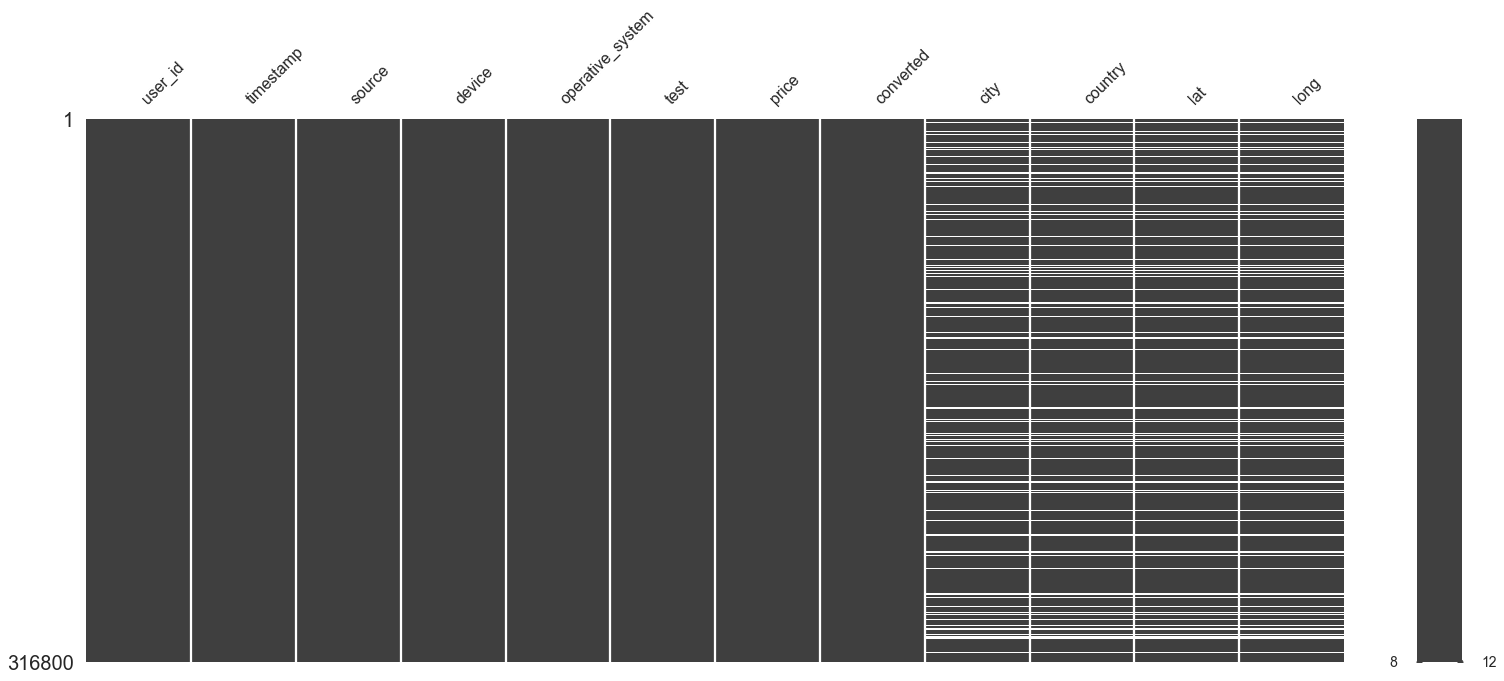

In [13]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix((df))
    plt.show()

In [14]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [15]:
for column in df.columns:
    top_freq = list(df[column].value_counts().index)
    print('{0:20s} {1:5d}\t'.format(column, len(top_freq)), top_freq[:5])

user_id              316800	 [2047, 338394, 465846, 407572, 753429]
timestamp            140931	 ['2015-04-12 11:51:16', '2015-05-25 07:27:08', '2015-04-04 17:38:26', '2015-04-10 08:29:07', '2015-04-10 17:01:33']
source                  12	 ['direct_traffic', 'ads-google', 'ads_facebook', 'ads_other', 'seo-google']
device                   2	 ['mobile', 'web']
operative_system         6	 ['windows', 'iOS', 'android', 'mac', 'other']
test                     2	 [0, 1]
price                    2	 [39, 59]
converted                2	 [0, 1]
city                   923	 ['New York', 'Chicago', 'Houston', 'San Antonio', 'Los Angeles']
country                  1	 ['USA']
lat                    713	 [40.67, 41.84, 29.77, 29.46, 34.11]
long                   830	 [-73.94, -87.68, -95.39, -98.51, -118.41]


In [16]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [17]:
df.groupby(['test','price','converted']).count()

user_id  timestamp  source  device  operative_system  \
test price converted                                                         
0    39    0           198487     198487  198487  198487            198487   
           1             4030       4030    4030    4030              4030   
     59    0              205        205     205     205               205   
           1                5          5       5       5                 5   
1    39    0              154        154     154     154               154   
           1                1          1       1       1                 1   
     59    0           112146     112146  112146  112146            112146   
           1             1772       1772    1772    1772              1772   

                        city  country     lat    long  
test price converted                                   
0    39    0          172757   172757  172757  172757  
           1            3484     3484    3484    3484  
     59    0             182      182     182     182  
           1               5        5       5       5  
1    39    0             135      135     135     135  
           1               0        0       0       0  
     59    0           97523    97523   97523   97523  
           1            1530     1530    1530    1530

###  there should be data containment which control group have price for 59 and treatment group have 39 record ! 

In [91]:
## let's remove them 
df_old = df 
df = df.query('(test == 0 and price == 39) or (test==1 and price ==59)')

In [28]:
df['rev']= (df['price']*df['test'])

C:\Users\jpouu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
df = df.assign(rev=lambda df: df['price']*df['converted'])
df = df.query('(test == 0 and price == 39) or (test==1 and price ==59)')


In [166]:
## it looks like 59$ dose generate more rev in that sense 
df.groupby('test').mean()

,user_id,price,converted,lat,long,rev,weekday
test,,,,,,,
0,499177.321889,39.0,0.019900,37.097212,-93.985221,0.776083,4.918091
1,499547.052634,59.0,0.015555,37.138323,-93.974115,0.917748,4.924849


In [122]:
ctr_val = df[df['test'] == 0]['rev'].values
exp_val =df[df['test'] == 1]['rev'].values
print(ttest_ind(ctr_val, exp_val, axis=0, equal_var=False))

Ttest_indResult(statistic=-5.715224666463108, pvalue=1.0972577312420781e-08)


### NOW let's find the user side fro insight

In [34]:
## 

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04


Text(0.5, 1.0, 'conversion_count')

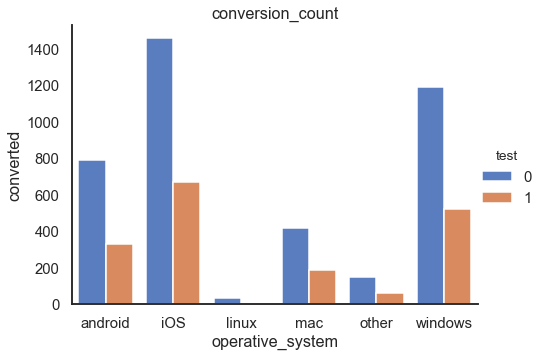

In [76]:
df_temp = df.groupby(['operative_system','test']).sum()['converted'].reset_index()
sns.catplot(data=df_temp,x='operative_system',y = 'converted',hue = 'test',kind = 'bar',aspect= 1.4)
plt.title("conversion_count")

###  From conversion_rate Mac & IOS user have higher conversion rate to price 59 
### something bad happen to linux test user 

Text(0.5, 1.0, 'conversion_rate')

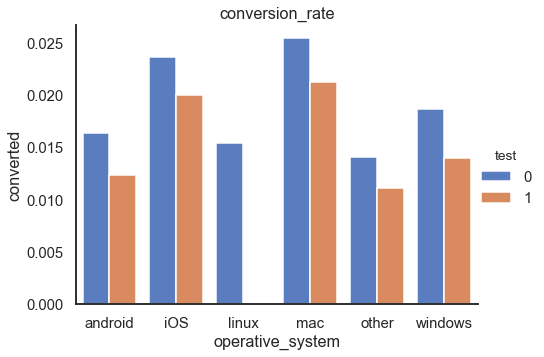

In [75]:


df_temp = df.groupby(['operative_system','test']).mean()['converted'].reset_index()
sns.catplot(data=df_temp,x='operative_system',y = 'converted',hue = 'test',kind = 'bar',aspect= 1.4)
plt.title("conversion_rate")

In [71]:
df.groupby(['operative_system','test']).sum()

user_id    price  converted         lat  \
operative_system test                                                
android          0     24102025910  1878903        787  1558550.51   
                 1     13378670547  1574887        330   862092.96   
iOS              0     30782586555  2409927       1458  1992676.87   
                 1     16760149866  1980040        671  1084976.44   
linux            0      1115655131    85956         34    71014.30   
                 1       962870711   113634          0    62983.53   
mac              0      8128153385   637455        416   529796.04   
                 1      4371403800   513890        185   279902.13   
other            0      5235665513   408759        147   342184.90   
                 1      2862305314   336064         63   183709.91   
windows          0     31727807203  2477163       1188  2043827.15   
                 1     18572000904  2202647        523  1204997.30   

                             long    rev  
operative_system test                     
android          0    -3947590.37  30693  
                 1    -2194368.79  19470  
iOS              0    -5060091.44  56862  
                 1    -2736905.23  39589  
linux            0     -182228.32   1326  
                 1     -160152.23      0  
mac              0    -1340877.09  16224  
                 1     -705612.18  10915  
other            0     -862658.22   5733  
                 1     -462065.47   3717  
windows          0    -5170603.96  46332  
                 1    -3049314.08  30857

In [67]:
#df.query('(test == 0 and price == 39) or (test==1 and price ==59)')
 

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,rev
222,850280,2015-03-28 11:01:13,friend_referral,web,linux,1,59,0,Indianapolis,USA,39.78,-86.15,0
240,885567,2015-05-07 23:02:02,direct_traffic,web,linux,1,59,0,Paterson,USA,40.91,-74.16,0
452,495025,2015-05-01 11:25:35,friend_referral,web,linux,1,59,0,NaN,NaN,NaN,NaN,0
537,404881,2015-03-31 08:18:11,seo-other,web,linux,1,59,0,New York,USA,40.67,-73.94,0
619,724165,2015-03-05 11:55:25,friend_referral,web,linux,1,59,0,Bellevue,USA,41.16,-95.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315231,772587,2015-05-03 06:09:02,direct_traffic,web,linux,1,59,0,Philadelphia,USA,40.01,-75.13,0
315270,459389,2015-05-04 10:22:13,ads-google,web,linux,1,59,0,Charlotte,USA,35.20,-80.83,0
315536,47811,2015-05-29 01:06:41,seo_facebook,web,linux,1,59,0,NaN,NaN,NaN,NaN,0
315541,352572,2015-03-13 04:40:27,friend_referral,web,linux,1,59,0,Durham,USA,35.98,-78.91,0


Text(0.5, 1.0, 'conversion_count')

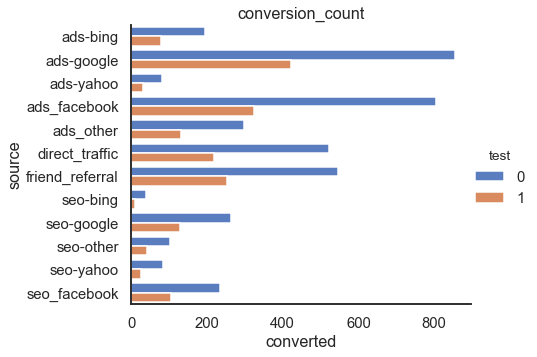

In [80]:
df_temp = df.groupby(['source','test']).sum()['converted'].reset_index()
sns.catplot(data=df_temp,x='converted',y = 'source',hue = 'test',kind = 'bar',aspect= 1.4)
plt.title("conversion_count")

## friend_referral and googld _ads  seems to be the most converted source 

Text(0.5, 1.0, 'conversion_rate')

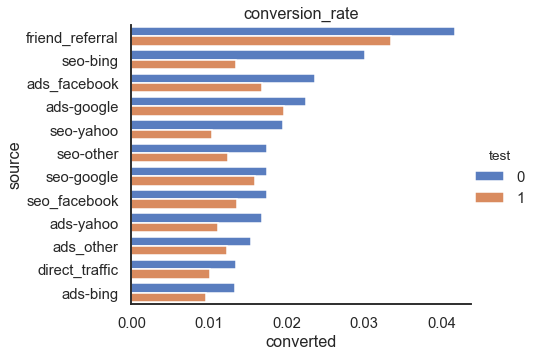

In [84]:
df_temp = df.groupby(['source','test']).mean()['converted'].reset_index()
df_temp= df_temp.sort_values('converted',ascending=False)

sns.catplot(data=df_temp,x='converted',y = 'source',hue = 'test',kind = 'bar',aspect= 1.4)
plt.title("conversion_rate")

In [123]:
df

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,rev
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04,0


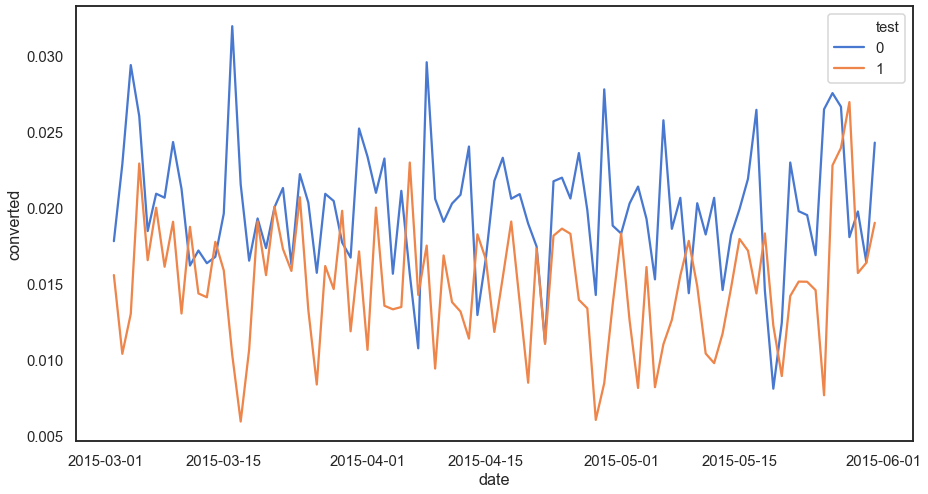

In [144]:
df_temp = df.groupby(['date','test']).mean()['converted'].reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y = 'converted',hue = 'test',data=df_temp)
 

## seems like huge different trend for conversion rate  in weekend ,  much higher for test in Sat, much lower in Sun

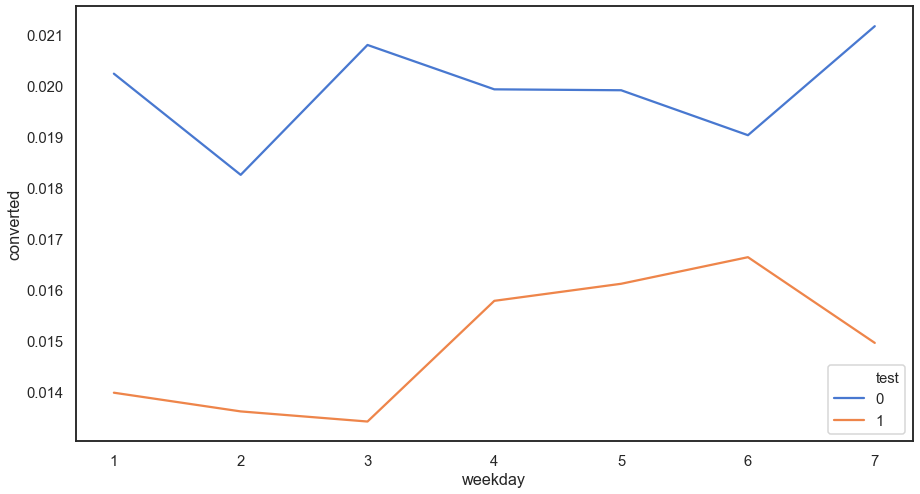

In [156]:
import datetime

df['weekday'] = (df['date'].dt.weekday+1)
df_temp = df.groupby(['weekday','test']).mean()['converted'].reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(x='weekday',y = 'converted',hue = 'test',data=df_temp)